In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import math
import random
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# **Data Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Dataset

In [ ]:
df = pd.read_csv("drive/My Drive/TA/DatHSR.csv")
df.head()

,userName,score,at,content,Gameplay,Visual,Performance,Feature
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userName     1000 non-null   object
 1   score        1000 non-null   int64 
 2   at           1000 non-null   object
 3   content      1000 non-null   object
 4   Gameplay     1000 non-null   int64 
 5   Visual       1000 non-null   int64 
 6   Performance  1000 non-null   int64 
 7   Feature      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [ ]:
df.dropna(inplace=True)

# **PreProcessing**

## Punctuation Removal

Pengilangan simbol khusus seperti \r, \n, ", url, dan byte code

In [ ]:
def cleaning(df):
    df = re.sub(r"\n", " ",df)
    df = re.sub(r"\r", " ",df)
    df = re.sub(r"\u00a0", " ",df)
    df = re.sub(r"[-_<>*#$@()\"/%&;:<>{}`+=~|.!?,']", " ", df) #hapus simbol
    df = re.sub(r"[^a-zA-Z]", " ",df) # menghilangkan angka
    df = re.sub("\s\s+", " ",df) # menghilangkan double spasi
    return df

df['punctuation'] = df['content'].apply(cleaning)
df.head(10)

,userName,score,at,content,Gameplay,Visual,Performance,Feature,punctuation
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1,Semua hal dari game ini udah bagus dan keluhan...
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1,Yang jelek dari game ini cuma optimasi grafis ...
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1,Masih ada beberapa bug Saat mau login Lag pata...
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1,Setelah update terdapat bug di quest main stor...
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1,masukan dari saya cukup adain fitur raid agar ...
5,Vrista Chan シ,4,2023-06-11 1:26:47,"Game nya seru bertema anime² gitu, grafik nya ...",-1,1,-1,-1,Game nya seru bertema anime gitu grafik nya ju...
6,ZV• RPG,3,2023-06-26 16:40:14,"Masih ada bug di in game android version, sepe...",1,1,-1,1,Masih ada bug di in game android version seper...
7,PG,4,2023-06-27 12:46:04,Secara keseluruhan gameplay dari game ini bisa...,1,-1,1,1,Secara keseluruhan gameplay dari game ini bisa...
8,M.Rafly D,5,2023-07-19 1:26:25,"Game yang bergenre turn based games, dengan ka...",1,1,1,1,Game yang bergenre turn based games dengan kar...
9,Harun Ar Rasyid,3,2023-06-29 3:58:55,Perlu optimalisasi di bagian latar tempat agar...,1,1,-1,-1,Perlu optimalisasi di bagian latar tempat agar...


## Case Folding

In [ ]:
df['casefold'] = df['punctuation'].apply((str.lower))
df.head(10)

,userName,score,at,content,Gameplay,Visual,Performance,Feature,punctuation,casefold
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1,Semua hal dari game ini udah bagus dan keluhan...,semua hal dari game ini udah bagus dan keluhan...
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1,Yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari game ini cuma optimasi grafis ...
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1,Masih ada beberapa bug Saat mau login Lag pata...,masih ada beberapa bug saat mau login lag pata...
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1,Setelah update terdapat bug di quest main stor...,setelah update terdapat bug di quest main stor...
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...
5,Vrista Chan シ,4,2023-06-11 1:26:47,"Game nya seru bertema anime² gitu, grafik nya ...",-1,1,-1,-1,Game nya seru bertema anime gitu grafik nya ju...,game nya seru bertema anime gitu grafik nya ju...
6,ZV• RPG,3,2023-06-26 16:40:14,"Masih ada bug di in game android version, sepe...",1,1,-1,1,Masih ada bug di in game android version seper...,masih ada bug di in game android version seper...
7,PG,4,2023-06-27 12:46:04,Secara keseluruhan gameplay dari game ini bisa...,1,-1,1,1,Secara keseluruhan gameplay dari game ini bisa...,secara keseluruhan gameplay dari game ini bisa...
8,M.Rafly D,5,2023-07-19 1:26:25,"Game yang bergenre turn based games, dengan ka...",1,1,1,1,Game yang bergenre turn based games dengan kar...,game yang bergenre turn based games dengan kar...
9,Harun Ar Rasyid,3,2023-06-29 3:58:55,Perlu optimalisasi di bagian latar tempat agar...,1,1,-1,-1,Perlu optimalisasi di bagian latar tempat agar...,perlu optimalisasi di bagian latar tempat agar...


## Word Normalization

In [ ]:
kamus_normal = pd.read_csv("drive/My Drive/TA/normalisasi.csv",
                           header=None,
                           names=["non-standard word","standard word"])
kamus_normal.head()

,non-standard word,standard word
0,bikin,membuat
1,yg,yang
2,guee,saya
3,udah,sudah
4,stuck,tertahan


In [ ]:
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

def normalize_text(text, stdword_, nonstdword_):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

def normalizeData(data, stdword_, nonstdword_):
    data = data.map(lambda com : normalize_text(com,stdword_,nonstdword_))
    return data

df['normal'] = normalizeData(df['casefold'], stdword, nonstdword)
df.head()

,userName,score,at,content,Gameplay,Visual,Performance,Feature,punctuation,casefold,normal
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1,Semua hal dari game ini udah bagus dan keluhan...,semua hal dari game ini udah bagus dan keluhan...,semua hal dari permainan ini sudah bagus dan k...
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1,Yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari permainan ini cuma optimasi gr...
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1,Masih ada beberapa bug Saat mau login Lag pata...,masih ada beberapa bug saat mau login lag pata...,masih ada beberapa bug saat mau login patah-pa...
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1,Setelah update terdapat bug di quest main stor...,setelah update terdapat bug di quest main stor...,setelah pembaruan terdapat bug di quest main s...
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...


## Meaningless Removal

In [ ]:
meaningless = pd.read_csv("drive/My Drive/TA/meaningless.csv",
                          header=None,
                          names=['stopword'])
meaningless = meaningless['stopword'].tolist()
meaningless

['kamu ',
 'aduh',
 'ah',
 'ahelah',
 'amp',
 'aw',
 'aww',
 'beb',
 'bebb',
 'bete',
 'btw',
 'cyiinn',
 'cyin',
 'dah',
 'deh',
 'doang',
 'duh',
 'duhhh',
 'eeh',
 'eh',
 'ehh',
 'ew',
 'ewh',
 'ftw',
 'haduh',
 'ha',
 'hah',
 'haha',
 'hahaa',
 'hahaha',
 'hahahaa',
 'hahh',
 'hahhaa',
 'hahhahah',
 'he',
 'hehe',
 'hehehe',
 'hi',
 'hihi',
 'hihihi',
 'hiks',
 'hikss',
 'hiksss',
 'hmm',
 'hmmm',
 'hmmmm',
 'huft',
 'hufttt',
 'huhu',
 'huhuhu',
 'huhuhuu',
 'huhuu',
 'ih',
 'iiih',
 'iih',
 'ihhh',
 'ihh',
 'ko',
 'kog',
 'kok',
 'laah',
 'lah',
 'lebay',
 'lel',
 'lha',
 'lho',
 'lmao',
 'loh',
 'lohh',
 'lol',
 'looh',
 'muuaahh',
 'mwah',
 'mwahh',
 'nbsp',
 'nya',
 'nyaww',
 'oo',
 'ooo',
 'ooohh',
 'ooh',
 'oh',
 'ohh',
 'okayy',
 'okay',
 'okee',
 'okey',
 'okei',
 'oki',
 'oke',
 'ok',
 'ohhh',
 'ohiya',
 'ohya',
 'oiya',
 'oiyaa',
 'omg',
 'otw',
 'quot',
 'sayy',
 'si',
 'supeeerrr',
 'super',
 'superr',
 'waduh',
 'waduh',
 'waduhh',
 'wah',
 'waw',
 'wew',
 'wih',
 'wk

In [ ]:
def removeMeaningless(data):
    meaningless = pd.read_csv("drive/My Drive/TA/meaningless.csv",
                              header=None,
                              names=['stopword'])
    meaningless = meaningless['stopword'].tolist()
    for word in meaningless:
        data = re.sub(r"\b" + word + r"\b" , " ",data)
    return data

df['meaningless'] = df['normal'].apply(removeMeaningless)
df.head()

,userName,score,at,content,Gameplay,Visual,Performance,Feature,punctuation,casefold,normal,meaningless
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1,Semua hal dari game ini udah bagus dan keluhan...,semua hal dari game ini udah bagus dan keluhan...,semua hal dari permainan ini sudah bagus dan k...,semua hal dari permainan ini sudah bagus dan k...
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1,Yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari permainan ini cuma optimasi gr...,jelek dari permainan ini cuma optimasi grafi...
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1,Masih ada beberapa bug Saat mau login Lag pata...,masih ada beberapa bug saat mau login lag pata...,masih ada beberapa bug saat mau login patah-pa...,masih ada beberapa bug saat mau login patah-pa...
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1,Setelah update terdapat bug di quest main stor...,setelah update terdapat bug di quest main stor...,setelah pembaruan terdapat bug di quest main s...,setelah pembaruan terdapat bug di quest main s...
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...


## Tokenizing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize(text):
    return word_tokenize(text)

df['token'] = df['punctuation'].apply(tokenize)
df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,userName,score,at,content,Gameplay,Visual,Performance,Feature,punctuation,casefold,normal,meaningless,token
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1,Semua hal dari game ini udah bagus dan keluhan...,semua hal dari game ini udah bagus dan keluhan...,semua hal dari permainan ini sudah bagus dan k...,semua hal dari permainan ini sudah bagus dan k...,"[Semua, hal, dari, game, ini, udah, bagus, dan..."
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1,Yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari permainan ini cuma optimasi gr...,jelek dari permainan ini cuma optimasi grafi...,"[Yang, jelek, dari, game, ini, cuma, optimasi,..."
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1,Masih ada beberapa bug Saat mau login Lag pata...,masih ada beberapa bug saat mau login lag pata...,masih ada beberapa bug saat mau login patah-pa...,masih ada beberapa bug saat mau login patah-pa...,"[Masih, ada, beberapa, bug, Saat, mau, login, ..."
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1,Setelah update terdapat bug di quest main stor...,setelah update terdapat bug di quest main stor...,setelah pembaruan terdapat bug di quest main s...,setelah pembaruan terdapat bug di quest main s...,"[Setelah, update, terdapat, bug, di, quest, ma..."
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,"[masukan, dari, saya, cukup, adain, fitur, rai..."
5,Vrista Chan シ,4,2023-06-11 1:26:47,"Game nya seru bertema anime² gitu, grafik nya ...",-1,1,-1,-1,Game nya seru bertema anime gitu grafik nya ju...,game nya seru bertema anime gitu grafik nya ju...,permainan nya seru bertema anime gitu grafik n...,permainan seru bertema anime gitu grafik j...,"[Game, nya, seru, bertema, anime, gitu, grafik..."
6,ZV• RPG,3,2023-06-26 16:40:14,"Masih ada bug di in game android version, sepe...",1,1,-1,1,Masih ada bug di in game android version seper...,masih ada bug di in game android version seper...,masih ada bug di in permainan android version ...,masih ada bug di in permainan android version ...,"[Masih, ada, bug, di, in, game, android, versi..."
7,PG,4,2023-06-27 12:46:04,Secara keseluruhan gameplay dari game ini bisa...,1,-1,1,1,Secara keseluruhan gameplay dari game ini bisa...,secara keseluruhan gameplay dari game ini bisa...,secara keseluruhan permainan dari permainan in...,secara keseluruhan permainan dari permainan in...,"[Secara, keseluruhan, gameplay, dari, game, in..."
8,M.Rafly D,5,2023-07-19 1:26:25,"Game yang bergenre turn based games, dengan ka...",1,1,1,1,Game yang bergenre turn based games dengan kar...,game yang bergenre turn based games dengan kar...,permainan yang bergenre turn based games denga...,permainan bergenre turn based games dengan k...,"[Game, yang, bergenre, turn, based, games, den..."
9,Harun Ar Rasyid,3,2023-06-29 3:58:55,Perlu optimalisasi di bagian latar tempat agar...,1,1,-1,-1,Perlu optimalisasi di bagian latar tempat agar...,perlu optimalisasi di bagian latar tempat agar...,perlu optimalisasi di bagian latar tempat agar...,perlu optimalisasi di bagian latar tempat agar...,"[Perlu, optimalisasi, di, bagian, latar, tempa..."


## Stopword Removal (Sastrawi)

In [ ]:
df[['casefold','token']].to_csv('stopwords.txt', index=False)

In [ ]:
#stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('indonesian')
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)
stop.extend(txt_stopword["stopwords"][0].split(' '))
stop.append('nya')
def stopword (hasil_token):
    return [word for word in hasil_token if word not in stop]
df['stop']=df['token'].apply(lambda x: stopword(x))
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,userName,score,at,content,Gameplay,Visual,Performance,Feature,punctuation,casefold,normal,meaningless,token,stop
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1,Semua hal dari game ini udah bagus dan keluhan...,semua hal dari game ini udah bagus dan keluhan...,semua hal dari permainan ini sudah bagus dan k...,semua hal dari permainan ini sudah bagus dan k...,"[Semua, hal, dari, game, ini, udah, bagus, dan...","[Semua, game, udah, bagus, keluhan, cuman, mat..."
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1,Yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari permainan ini cuma optimasi gr...,jelek dari permainan ini cuma optimasi grafi...,"[Yang, jelek, dari, game, ini, cuma, optimasi,...","[Yang, jelek, game, optimasi, grafis, pengelol..."
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1,Masih ada beberapa bug Saat mau login Lag pata...,masih ada beberapa bug saat mau login lag pata...,masih ada beberapa bug saat mau login patah-pa...,masih ada beberapa bug saat mau login patah-pa...,"[Masih, ada, beberapa, bug, Saat, mau, login, ...","[Masih, bug, Saat, login, Lag, patah, sinyalny..."
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1,Setelah update terdapat bug di quest main stor...,setelah update terdapat bug di quest main stor...,setelah pembaruan terdapat bug di quest main s...,setelah pembaruan terdapat bug di quest main s...,"[Setelah, update, terdapat, bug, di, quest, ma...","[Setelah, update, bug, quest, main, story, upd..."
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,"[masukan, dari, saya, cukup, adain, fitur, rai...","[masukan, adain, fitur, raid, mempercepat, pro..."
5,Vrista Chan シ,4,2023-06-11 1:26:47,"Game nya seru bertema anime² gitu, grafik nya ...",-1,1,-1,-1,Game nya seru bertema anime gitu grafik nya ju...,game nya seru bertema anime gitu grafik nya ju...,permainan nya seru bertema anime gitu grafik n...,permainan seru bertema anime gitu grafik j...,"[Game, nya, seru, bertema, anime, gitu, grafik...","[Game, seru, bertema, anime, gitu, grafik, bag..."
6,ZV• RPG,3,2023-06-26 16:40:14,"Masih ada bug di in game android version, sepe...",1,1,-1,1,Masih ada bug di in game android version seper...,masih ada bug di in game android version seper...,masih ada bug di in permainan android version ...,masih ada bug di in permainan android version ...,"[Masih, ada, bug, di, in, game, android, versi...","[Masih, bug, in, game, android, version, bug, ..."
7,PG,4,2023-06-27 12:46:04,Secara keseluruhan gameplay dari game ini bisa...,1,-1,1,1,Secara keseluruhan gameplay dari game ini bisa...,secara keseluruhan gameplay dari game ini bisa...,secara keseluruhan permainan dari permainan in...,secara keseluruhan permainan dari permainan in...,"[Secara, keseluruhan, gameplay, dari, game, in...","[Secara, gameplay, game, d, blg, menyenangkan,..."
8,M.Rafly D,5,2023-07-19 1:26:25,"Game yang bergenre turn based games, dengan ka...",1,1,1,1,Game yang bergenre turn based games dengan kar...,game yang bergenre turn based games dengan kar...,permainan yang bergenre turn based games denga...,permainan bergenre turn based games dengan k...,"[Game, yang, bergenre, turn, based, games, den...","[Game, bergenre, turn, based, games, karakter,..."
9,Harun Ar Rasyid,3,2023-06-29 3:58:55,Perlu optimalisasi di bagian latar tempat agar...,1,1,-1,-1,Perlu optimalisasi di bagian latar tempat agar...,perlu optimalisasi di bagian latar tempat agar...,perlu optimalisasi di bagian latar tempat agar...,perlu optimalisasi di bagian latar tempat agar...,"[Perlu, optima

## Stemming (Sastrawi)

In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=1bbe8444ebc5b063d49601c930296b7e99daeeecef7d2f35e0acd23be5362463
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
#stemming:menghilangkan imbuhan kata
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
factory=StemmerFactory()
stemmer=factory.create_stemmer()

#stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict={}
for document in df['stop']:
    for term in document:
        if term not in term_dict:
            term_dict[term]=''

for term in term_dict:
    term_dict[term]=stemmed_wrapper(term)

#aplikasikan stemming pada dataframe
def stemming(document):
    return[term_dict[term] for term in document]
df['stem']=df['stop'].apply(lambda x: stemming(x))
df.head()

,userName,score,at,content,Gameplay,Visual,Performance,Feature,punctuation,casefold,normal,meaningless,token,stop,stem
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1,Semua hal dari game ini udah bagus dan keluhan...,semua hal dari game ini udah bagus dan keluhan...,semua hal dari permainan ini sudah bagus dan k...,semua hal dari permainan ini sudah bagus dan k...,"[Semua, hal, dari, game, ini, udah, bagus, dan...","[Semua, game, udah, bagus, keluhan, cuman, mat...","[semua, game, udah, bagus, keluh, cuman, mater..."
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1,Yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari permainan ini cuma optimasi gr...,jelek dari permainan ini cuma optimasi grafi...,"[Yang, jelek, dari, game, ini, cuma, optimasi,...","[Yang, jelek, game, optimasi, grafis, pengelol...","[yang, jelek, game, optimasi, grafis, kelola, ..."
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1,Masih ada beberapa bug Saat mau login Lag pata...,masih ada beberapa bug saat mau login lag pata...,masih ada beberapa bug saat mau login patah-pa...,masih ada beberapa bug saat mau login patah-pa...,"[Masih, ada, beberapa, bug, Saat, mau, login, ...","[Masih, bug, Saat, login, Lag, patah, sinyalny...","[masih, bug, saat, login, lag, patah, sinyal, ..."
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1,Setelah update terdapat bug di quest main stor...,setelah update terdapat bug di quest main stor...,setelah pembaruan terdapat bug di quest main s...,setelah pembaruan terdapat bug di quest main s...,"[Setelah, update, terdapat, bug, di, quest, ma...","[Setelah, update, bug, quest, main, story, upd...","[telah, update, bug, quest, main, story, updat..."
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,"[masukan, dari, saya, cukup, adain, fitur, rai...","[masukan, adain, fitur, raid, mempercepat, pro...","[masuk, adain, fitur, raid, cepat, progres, ke..."


# Penggabungan Hasil Stemming Menjadi Teks Utuh

In [ ]:
df['final_text'] = df['stem'].apply(lambda x: ' '.join(x))
df.head()

,userName,score,at,content,Gameplay,Visual,Performance,Feature,punctuation,casefold,normal,meaningless,token,stop,stem,final_text
0,Farid Ahmad,5,2023-07-19 3:25:08,Semua hal dari game ini udah bagus dan keluhan...,1,1,1,-1,Semua hal dari game ini udah bagus dan keluhan...,semua hal dari game ini udah bagus dan keluhan...,semua hal dari permainan ini sudah bagus dan k...,semua hal dari permainan ini sudah bagus dan k...,"[Semua, hal, dari, game, ini, udah, bagus, dan...","[Semua, game, udah, bagus, keluhan, cuman, mat...","[semua, game, udah, bagus, keluh, cuman, mater...",semua game udah bagus keluh cuman material upg...
1,Haidar Gustav,2,2023-07-19 8:32:40,"Yang jelek dari game ini cuma optimasi grafis,...",-1,-1,1,-1,Yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari game ini cuma optimasi grafis ...,yang jelek dari permainan ini cuma optimasi gr...,jelek dari permainan ini cuma optimasi grafi...,"[Yang, jelek, dari, game, ini, cuma, optimasi,...","[Yang, jelek, game, optimasi, grafis, pengelol...","[yang, jelek, game, optimasi, grafis, kelola, ...",yang jelek game optimasi grafis kelola data ti...
2,Raihan N,3,2023-07-19 10:22:21,"Masih ada beberapa bug,Saat mau login Lag/pata...",-1,1,-1,1,Masih ada beberapa bug Saat mau login Lag pata...,masih ada beberapa bug saat mau login lag pata...,masih ada beberapa bug saat mau login patah-pa...,masih ada beberapa bug saat mau login patah-pa...,"[Masih, ada, beberapa, bug, Saat, mau, login, ...","[Masih, bug, Saat, login, Lag, patah, sinyalny...","[masih, bug, saat, login, lag, patah, sinyal, ...",masih bug saat login lag patah sinyal yg jelek...
3,yaqub sena,1,2023-07-19 13:13:16,Setelah update terdapat bug di quest main stor...,-1,1,-1,1,Setelah update terdapat bug di quest main stor...,setelah update terdapat bug di quest main stor...,setelah pembaruan terdapat bug di quest main s...,setelah pembaruan terdapat bug di quest main s...,"[Setelah, update, terdapat, bug, di, quest, ma...","[Setelah, update, bug, quest, main, story, upd...","[telah, update, bug, quest, main, story, updat...",telah update bug quest main story update updat...
4,Ae,5,2023-07-04 21:55:35,masukan dari saya cukup 1 adain fitur raid aga...,-1,1,-1,-1,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,masukan dari saya cukup adain fitur raid agar ...,"[masukan, dari, saya, cukup, adain, fitur, rai...","[masukan, adain, fitur, raid, mempercepat, pro...","[masuk, adain, fitur, raid, cepat, progres, ke...",masuk adain fitur raid cepat progres kembang k...


# **Split KFold, TF-IDF, CNB, & Confusion Matrix**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import ComplementNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import nltk
# Fungsi untuk melakukan Stratified K-Fold Cross Validation dan evaluasi model
def stratified_k_fold_cross_validation_multilabel(df, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    X = df['final_text']
    y = df[['Gameplay', 'Visual', 'Performance', 'Feature']]

    results = {
        'Gameplay': [],
        'Visual': [],
        'Performance': [],
        'Feature': []
    }

    # Menggunakan salah satu label untuk stratification
    for fold, (train_index, test_index) in enumerate(skf.split(X, y['Gameplay']), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # TF-IDF Vectorizer
        vectorizer = TfidfVectorizer()
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)

        # Complement Naive Bayes
        clf = MultiOutputClassifier(ComplementNB(alpha=0.4))
        clf.fit(X_train_tfidf, y_train)
        y_pred = clf.predict(X_test_tfidf)

        # Confusion Matrix
        for label in y.columns:
            cm = confusion_matrix(y_test[label], y_pred[:, y.columns.get_loc(label)])
            report = classification_report(y_test[label],
                                           y_pred[:, y.columns.get_loc(label)],
                                           digits=4, output_dict=True)

            result = {
                'accuracy': report['accuracy'],
                'precision': report['weighted avg']['precision'],
                'recall': report['weighted avg']['recall'],
                'f1_score': report['weighted avg']['f1-score'],
                'confusion_matrix': cm
            }

            results[label].append(result)

            # Print results for each fold
            print(f'Aspek {label} - Fold ke-{fold}:')
            print(f'  Akurasi: {result["accuracy"]:.4f}')
            print(f'  Presisi: {result["precision"]:.4f}')
            print(f'  Recall: {result["recall"]:.4f}')
            print(f'  F1-Score: {result["f1_score"]:.4f}')
            print()

    return results

# Memanggil fungsi Stratified K-Fold Cross Validation
results = stratified_k_fold_cross_validation_multilabel(df)

Aspek Gameplay - Fold ke-1:
  Akurasi: 0.7000
  Presisi: 0.7047
  Recall: 0.7000
  F1-Score: 0.7021

Aspek Visual - Fold ke-1:
  Akurasi: 0.7100
  Presisi: 0.7081
  Recall: 0.7100
  F1-Score: 0.7084

Aspek Performance - Fold ke-1:
  Akurasi: 0.8000
  Presisi: 0.7744
  Recall: 0.8000
  F1-Score: 0.7805

Aspek Feature - Fold ke-1:
  Akurasi: 0.8350
  Presisi: 0.8272
  Recall: 0.8350
  F1-Score: 0.8304

Aspek Gameplay - Fold ke-2:
  Akurasi: 0.6800
  Presisi: 0.6733
  Recall: 0.6800
  F1-Score: 0.6760

Aspek Visual - Fold ke-2:
  Akurasi: 0.6700
  Presisi: 0.6704
  Recall: 0.6700
  F1-Score: 0.6685

Aspek Performance - Fold ke-2:
  Akurasi: 0.7700
  Presisi: 0.7248
  Recall: 0.7700
  F1-Score: 0.7367

Aspek Feature - Fold ke-2:
  Akurasi: 0.8000
  Presisi: 0.7824
  Recall: 0.8000
  F1-Score: 0.7825

Aspek Gameplay - Fold ke-3:
  Akurasi: 0.7250
  Presisi: 0.7240
  Recall: 0.7250
  F1-Score: 0.7245

Aspek Visual - Fold ke-3:
  Akurasi: 0.6550
  Presisi: 0.6548
  Recall: 0.6550
  F1-Score: 

Label: Gameplay
Average Accuracy: 0.7200
Average Precision: 0.7170
Average Recall: 0.7200
Average F1-Score: 0.7177

Label: Visual
Average Accuracy: 0.6940
Average Precision: 0.6939
Average Recall: 0.6940
Average F1-Score: 0.6928

Label: Performance
Average Accuracy: 0.7780
Average Precision: 0.7449
Average Recall: 0.7780
Average F1-Score: 0.7525

Label: Feature
Average Accuracy: 0.7910
Average Precision: 0.7714
Average Recall: 0.7910
Average F1-Score: 0.7762



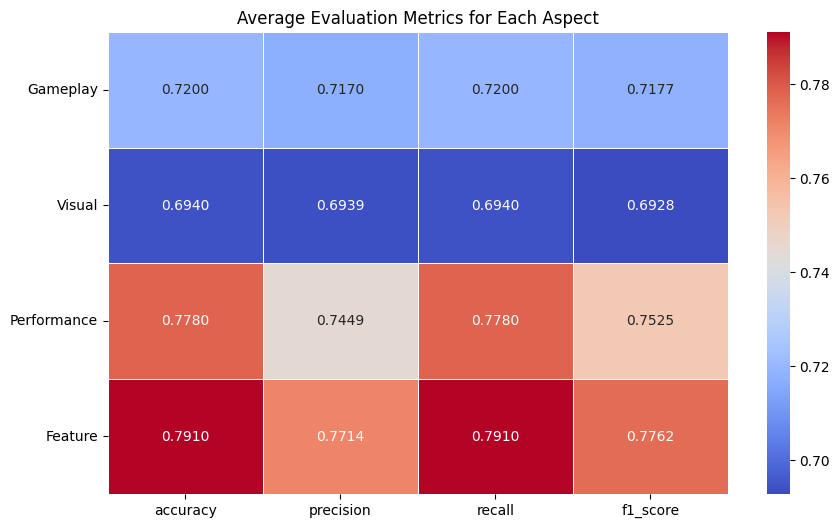

In [ ]:
# Menghitung rata-rata hasil evaluasi
def average_results(results):
    average = {}
    for label, metrics in results.items():
        avg_metrics = {
            'accuracy': np.mean([m['accuracy'] for m in metrics]),
            'precision': np.mean([m['precision'] for m in metrics]),
            'recall': np.mean([m['recall'] for m in metrics]),
            'f1_score': np.mean([m['f1_score'] for m in metrics])
        }
        average[label] = avg_metrics
    return average

average_metrics = average_results(results)

for label, metrics in average_metrics.items():
    print(f'Label: {label}')
    print(f"Average Accuracy: {metrics['accuracy']:.4f}")
    print(f"Average Precision: {metrics['precision']:.4f}")
    print(f"Average Recall: {metrics['recall']:.4f}")
    print(f"Average F1-Score: {metrics['f1_score']:.4f}")
    print()

# Visualisasi heatmap
metrics_df = pd.DataFrame(average_metrics).T

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, fmt=".4f")
plt.title('Average Evaluation Metrics for Each Aspect')
plt.yticks(rotation=0)
plt.show()

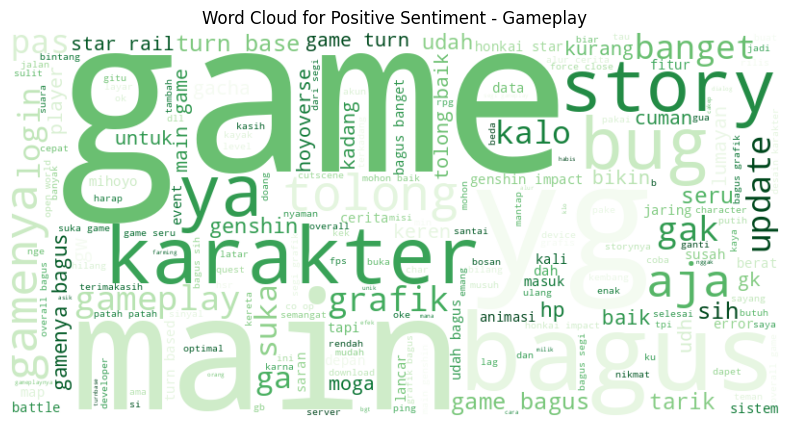

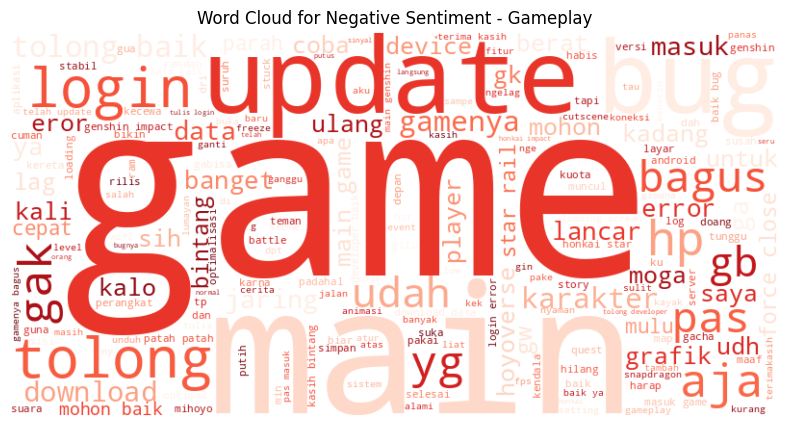

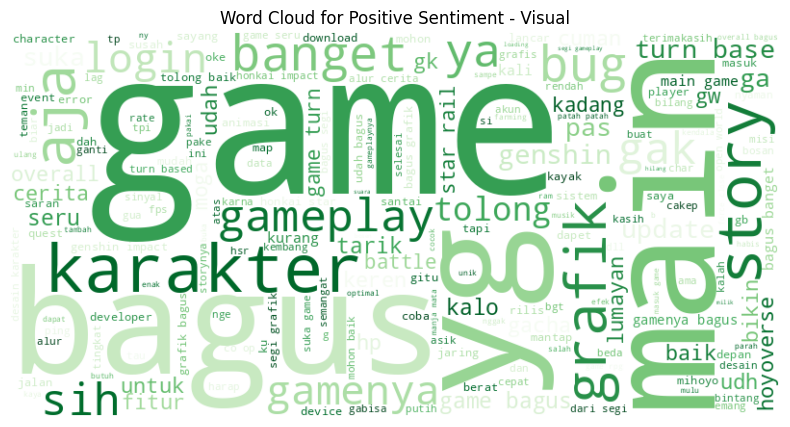

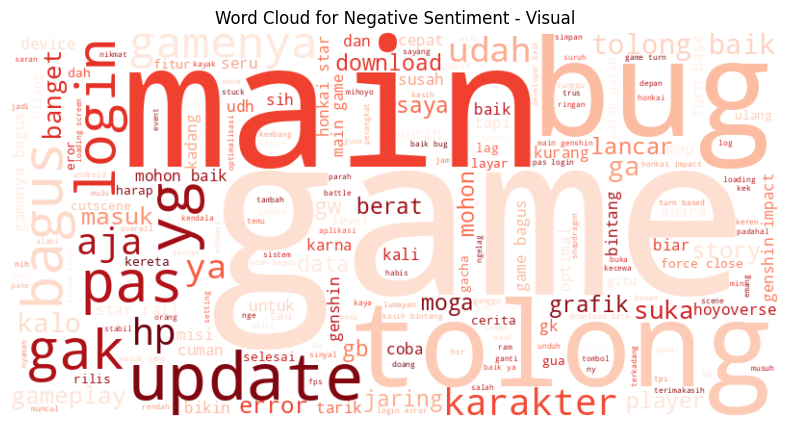

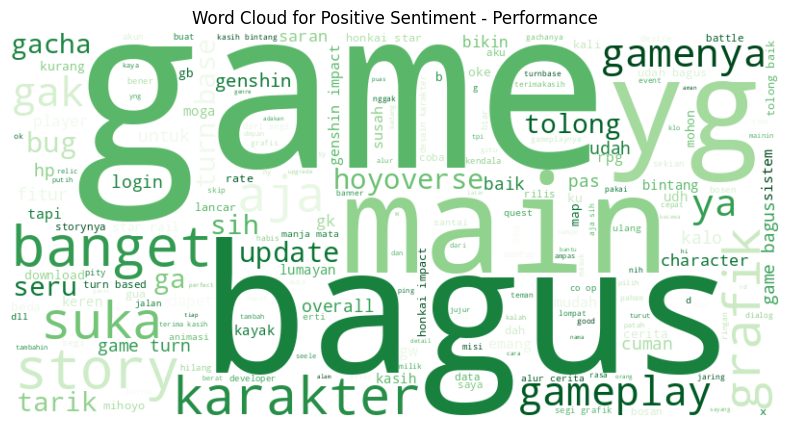

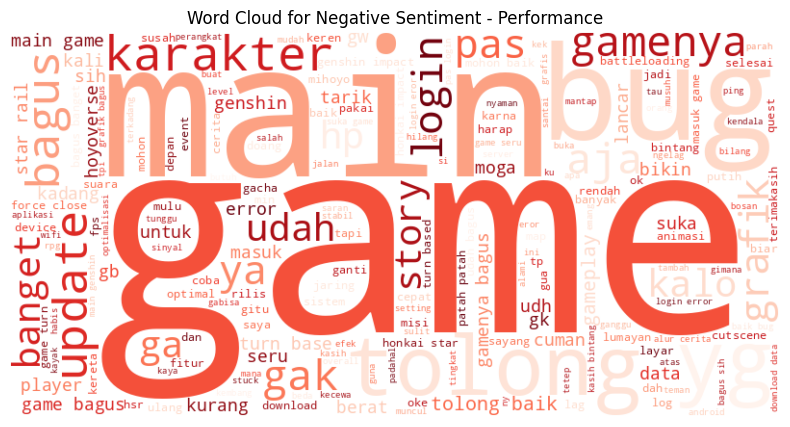

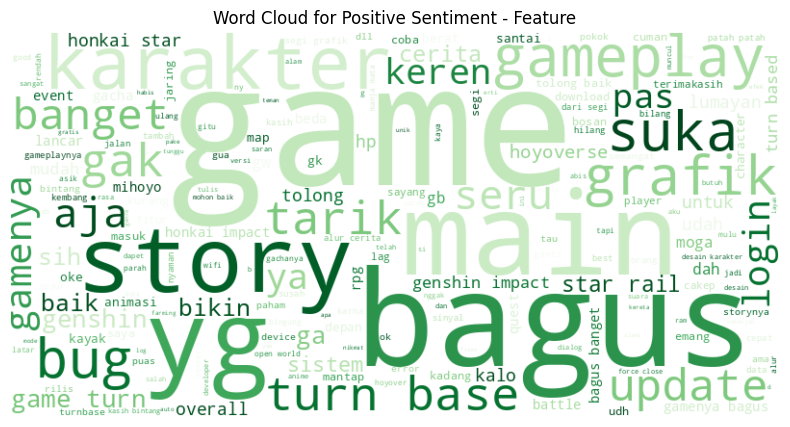

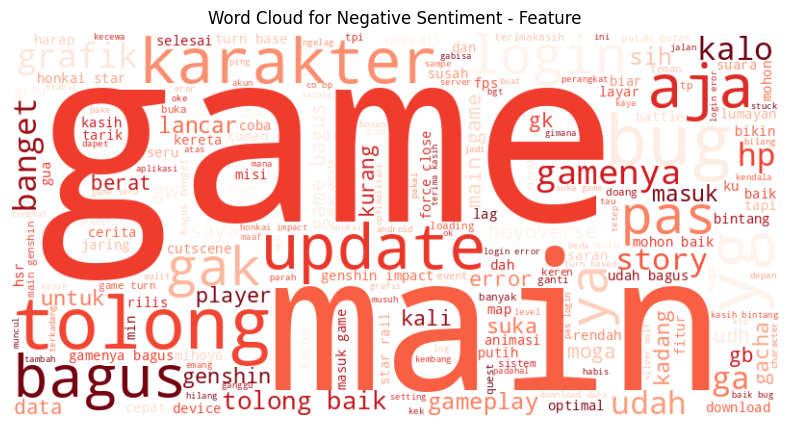

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to create and display word cloud
def generate_wordcloud(text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Combine text for each aspect and sentiment category
aspects = ['Gameplay', 'Visual', 'Performance', 'Feature']
colormaps = {'positive': 'Greens', 'negative': 'Reds'}

for aspect in aspects:
    positive_text = ' '.join(df[df[aspect] == 1]['final_text'])
    negative_text = ' '.join(df[df[aspect] == -1]['final_text'])

    generate_wordcloud(positive_text, f'Word Cloud for Positive Sentiment - {aspect}', colormaps['positive'])
    generate_wordcloud(negative_text, f'Word Cloud for Negative Sentiment - {aspect}', colormaps['negative'])


# Grid Search Hyperparameter Tunning

In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

f1_weighted_scorer = make_scorer(f1_score, average='weighted')
# Grid Search CV for Hyperparameter Tuning
def grid_search_cv_multilabel(df):
    X = df['final_text']
    y = df[['Gameplay', 'Visual', 'Performance', 'Feature']]
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X)
    clf = MultiOutputClassifier(ComplementNB())
    param_grid = {
        'estimator__alpha': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
    }
    grid_search = GridSearchCV(clf, param_grid, cv=5,
                               scoring=f1_weighted_scorer,
                               verbose=2,
                               n_jobs=-1)
    grid_search.fit(X_tfidf, y)
    print(f"Best parameters: {grid_search.best_params_}")
    # print(f"Best cross-validation score: {grid_search.best_score_}")

    return grid_search.best_estimator_
# Memanggil fungsi Grid Search CV
best_model = grid_search_cv_multilabel(df)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'estimator__alpha': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


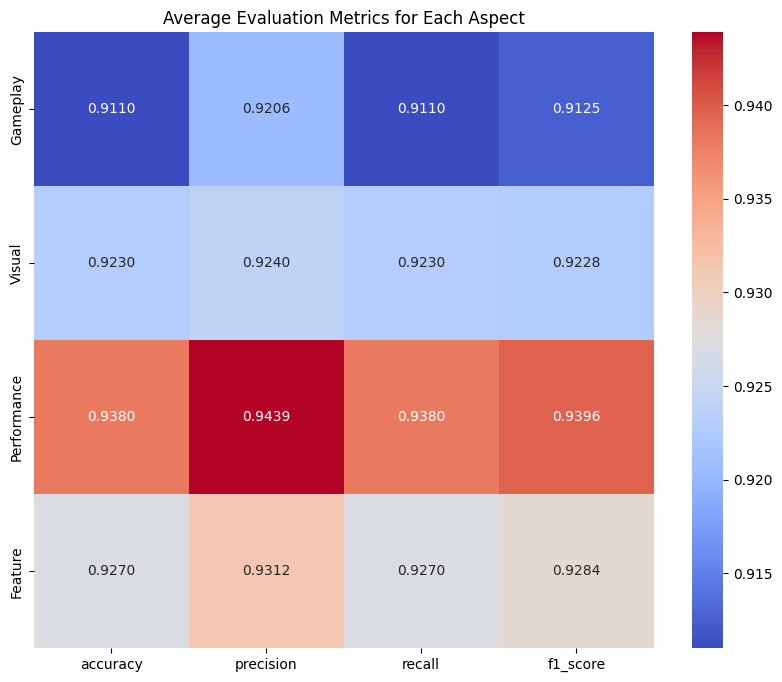

In [ ]:
# Evaluasi model terbaik pada seluruh data
X_final = df['final_text']
y_final = df[['Gameplay', 'Visual', 'Performance', 'Feature']]
X_final_tfidf = TfidfVectorizer().fit_transform(X_final)

best_model.fit(X_final_tfidf, y_final)
y_pred_final = best_model.predict(X_final_tfidf)

# Menyimpan hasil evaluasi
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
results = np.zeros((len(y_final.columns), len(metrics)))

for i, label in enumerate(y_final.columns):
    y_true = y_final[label]
    y_pred = y_pred_final[:, i]
    results[i, 0] = accuracy_score(y_true, y_pred)
    results[i, 1] = precision_score(y_true, y_pred, average='weighted')
    results[i, 2] = recall_score(y_true, y_pred, average='weighted')
    results[i, 3] = f1_score(y_true, y_pred, average='weighted')

# Membuat heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(results, annot=True, fmt='.4f', cmap='coolwarm', xticklabels=metrics, yticklabels=y_final.columns, ax=ax)
ax.set_title('Average Evaluation Metrics for Each Aspect')
plt.show()